In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

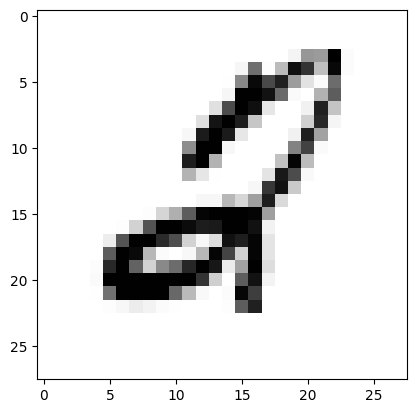

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[1033], cmap='Greys')
plt.show()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 784) # 이미지 하나를 가로로 길게 모양을 바꿔라 / 독립변수(feature)가 784개인 벡터

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_train = X_train.astype('float64')
X_train = X_train / 255

In [ ]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [ ]:
from keras.utils import to_categorical

# 정답은 원-핫 인코딩 진행
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(512, input_dim = 784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=100, batch_size=200,
                    verbose= 0, callbacks=[early_stopping_callback])

In [ ]:
model.evaluate(X_test, y_test)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9808 - loss: 0.0781


0.9829000234603882

In [ ]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, y_train.shape) # (50000, 32, 32, 3) (50000, 1)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
(50000, 32, 32, 3) (50000, 1)


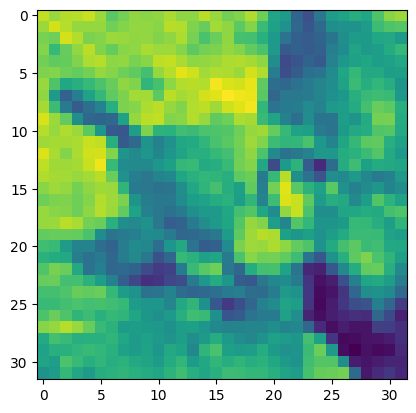

In [ ]:
plt.imshow(X_train[90, :, :, 0])
plt.show()

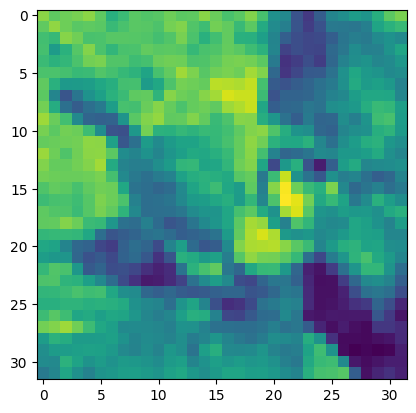

In [ ]:
plt.imshow(X_train[90, :, :, 1])
plt.show()

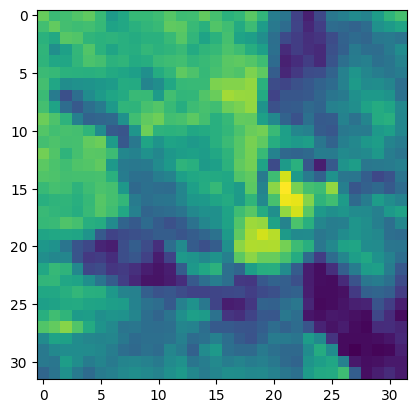

In [ ]:
plt.imshow(X_train[90, :, :, 2])
plt.show()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32*32*3) # 32*32*3 대신에 -1 넣어도 됨
X_test = X_test.reshape(X_test.shape[0], 32*32*3)